## Network visualization

*The examples below are adapted from the [collection of NetworkX examples](https://networkx.github.io/documentation/networkx-1.9/examples/index.html). NetworkX is included in the Anaconda Python distribution. A zip file containing the data used in these examples can be [downloaded here (click on 'download')](https://github.com/mmeagher/ARC6818/tree/master/files/network-data.zip).*

In [1]:
# This is a good way to start every jupyter notebook
%matplotlib inline

#### Random geometric graph

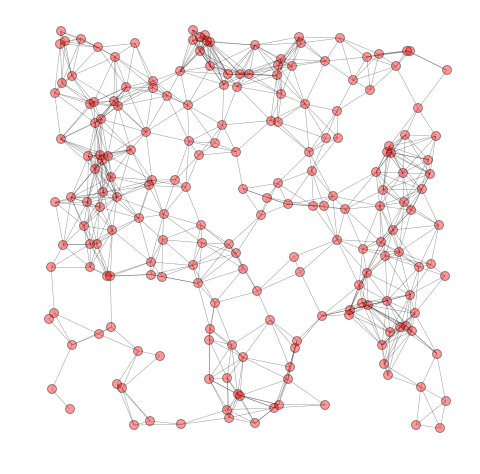

graph has 200 nodes with 870 edges and a density of 0.0437185929648


In [2]:
"""
First import NetworkX and Matplotlib: you need both to create network plots.
NetworkX is used to build the graph data structure, and Matplotlib to create 
visual output.

"""
import networkx as nx
import matplotlib.pyplot as plt

"""
NetworkX provides tools for creating random graphs for testing purposes.

"""
# generate a random graph 
G=nx.random_geometric_graph(200,0.125)
# position is stored as node attribute data for random_geometric_graph
pos=nx.get_node_attributes(G,'pos')

"""
Matplolib is used to set the plot parameters, and NetworkX to draw the edges and nodes.

"""
# set parameters for the graph visualization
plt.figure(figsize=(8,8))
nx.draw_networkx_edges(G,pos,width=0.5,alpha=0.4)
nx.draw_networkx_nodes(G,pos,
                       node_size=80,
                       alpha=0.4)

plt.xlim(-0.05,1.05)
plt.ylim(-0.05,1.05)
plt.axis('off')
plt.savefig('random_geometric_graph.png')
plt.show()

print("graph has " + str(nx.number_of_nodes(G)) + " nodes with " + str(nx.number_of_edges(G)) + " edges and a density of " + str(float(nx.density(G))))

#### Shortest path analysis

In [3]:
"""
Words/Ladder Graph
------------------
Generate  an undirected graph over the 5757 5-letter words in the 
datafile words_dat.txt.gz.  Two words are connected by an edge
if they differ in one letter, resulting in 14,135 edges. This example
is described in Section 1.1 in Knuth's book [1]_,[2]_.

References
----------
.. [1] Donald E. Knuth,
   "The Stanford GraphBase: A Platform for Combinatorial Computing",
   ACM Press, New York, 1993.
.. [2] http://www-cs-faculty.stanford.edu/~knuth/sgb.html
"""
__author__ = """\n""".join(['Aric Hagberg (hagberg@lanl.gov)',
                            'Brendt Wohlberg',
                            'hughdbrown@yahoo.com'])
#    Copyright (C) 2004-2010 by 
#    Aric Hagberg <hagberg@lanl.gov>
#    Dan Schult <dschult@colgate.edu>
#    Pieter Swart <swart@lanl.gov>
#    All rights reserved.
#    BSD license.

import networkx as nx

#-------------------------------------------------------------------
#   The Words/Ladder graph of Section 1.1
#-------------------------------------------------------------------
def generate_graph(words):
    from string import ascii_lowercase as lowercase
    G = nx.Graph(name="words")
    lookup = dict((c,lowercase.index(c)) for c in lowercase)
    def edit_distance_one(word):
        for i in range(len(word)):
            left, c, right = word[0:i], word[i], word[i+1:]
            j = lookup[c] # lowercase.index(c)
            for cc in lowercase[j+1:]:
                yield left + cc + right
    candgen = ((word, cand) for word in sorted(words) 
               for cand in edit_distance_one(word) if cand in words)
    G.add_nodes_from(words)
    for word, cand in candgen:
        G.add_edge(word, cand)
    return G

def words_graph():
    """Return the words example graph from the Stanford GraphBase"""
    import gzip
    fh=gzip.open('data/words_dat.txt.gz','r')
    words=set()
    for line in fh.readlines():
        line = line.decode()
        if line.startswith('*'):
            continue
        w=str(line[0:5])
        words.add(w)
    return generate_graph(words)

if __name__ == '__main__':
    from networkx import *
    G=words_graph()
    print("Loaded words_dat.txt containing 5757 five-letter English words.")
    print("Two words are connected if they differ in one letter.")
    print("Graph has %d nodes with %d edges"
          %(number_of_nodes(G),number_of_edges(G)))
    print("%d connected components" % number_connected_components(G))
    #Quick snapshot of the Network
    print (nx.info(G))
    print("Graph density:" + str(nx.density(G)))
    print("isolated nodes:" + str(nx.isolates(G)))
    print

    for (source,target) in [('chaos','order'),
                            ('nodes','graph'),
                            ('pound','marks'),
                            ('amigo','magus'),
                            ('amigo','boson'),
                            ('order','marks')]:
        print("Shortest path between %s and %s is"%(source,target))
        myCount = 1
        try:
            sp=shortest_path(G, source, target)
            for n in sp:
                print(str(myCount) + ":" + n)
                myCount+=1
        except nx.NetworkXNoPath:
            print("None")
        print






Loaded words_dat.txt containing 5757 five-letter English words.
Two words are connected if they differ in one letter.
Graph has 5757 nodes with 14135 edges
853 connected components
Name: words
Type: Graph
Number of nodes: 5757
Number of edges: 14135
Average degree:   4.9105
Graph density:0.000853117388108
isolated nodes:['xylem', 'jihad', 'aegis', 'elegy', 'shmoo', 'atoms', 'thwap', 'axels', 'copse', 'fanin', 'shiki', 'hadst', 'tulip', 'ovule', 'aargh', 'unpeg', 'duvet', 'educe', 'arrow', 'golem', 'miaow', 'peril', 'hymen', 'ulcer', 'buxom', 'cupid', 'lanai', 'cirri', 'apish', 'argue', 'matte', 'phyla', 'obese', 'phlox', 'geoid', 'goyim', 'tilde', 'icier', 'coqui', 'sulfa', 'annas', 'mocha', 'avail', 'width', 'music', 'ligne', 'fermi', 'exist', 'actor', 'melba', 'ephod', 'ameba', 'moola', 'endow', 'queue', 'angry', 'privy', 'matzo', 'lulab', 'ioctl', 'apron', 'sepal', 'edify', 'typal', 'rival', 'rehab', 'scuba', 'byway', 'batik', 'woosh', 'merit', 'fibre', 'gourd', 'actin', 'nonce', 'm

In [5]:
#Create network layout for visualizations
spring_pos = nx.spring_layout(G)



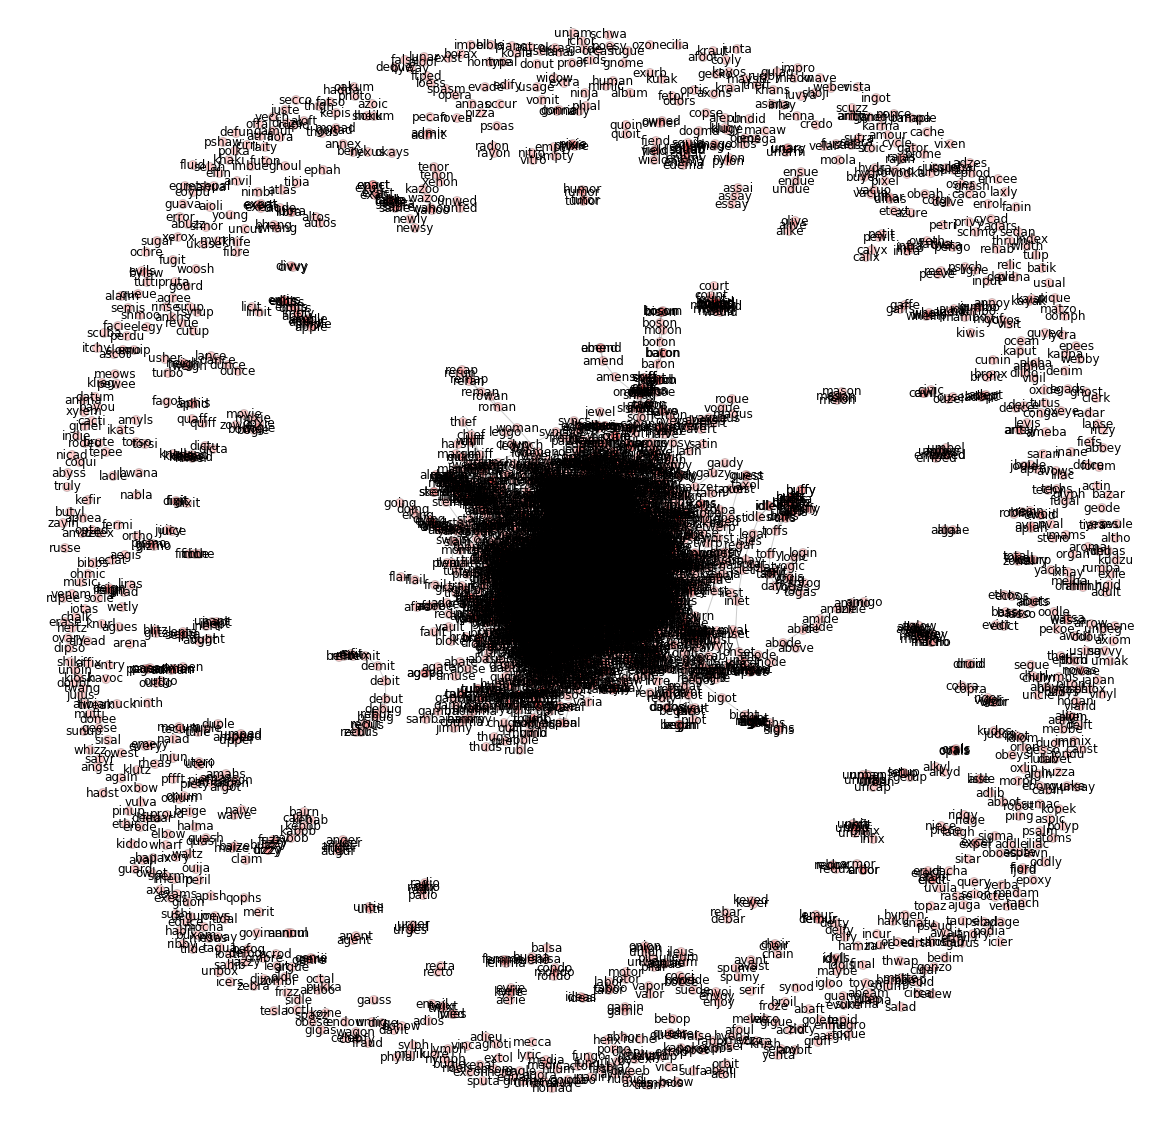

In [6]:
# set parameters for the graph visualization
plt.figure(figsize=(20,20))
# nx.draw_networkx_edges(G,pos = spring_pos,width=0.5, with_labels = True, alpha=0.4)
# nx.draw_networkx_nodes(G,pos = spring_pos, node_size=80, with_labels = True, alpha=0.4)
            
nx.draw_networkx(G,pos = spring_pos, node_size=80, with_labels = True, alpha=0.2)

plt.xlim(-1.05,1.05)
plt.ylim(-1.05,1.05)
plt.axis('off')
plt.savefig('random_geometric_graph.png')
plt.show()


#### Geographic information graph

Loaded miles_dat.txt containing 128 cities.
digraph has 128 nodes with 8128 edges and a density of 1


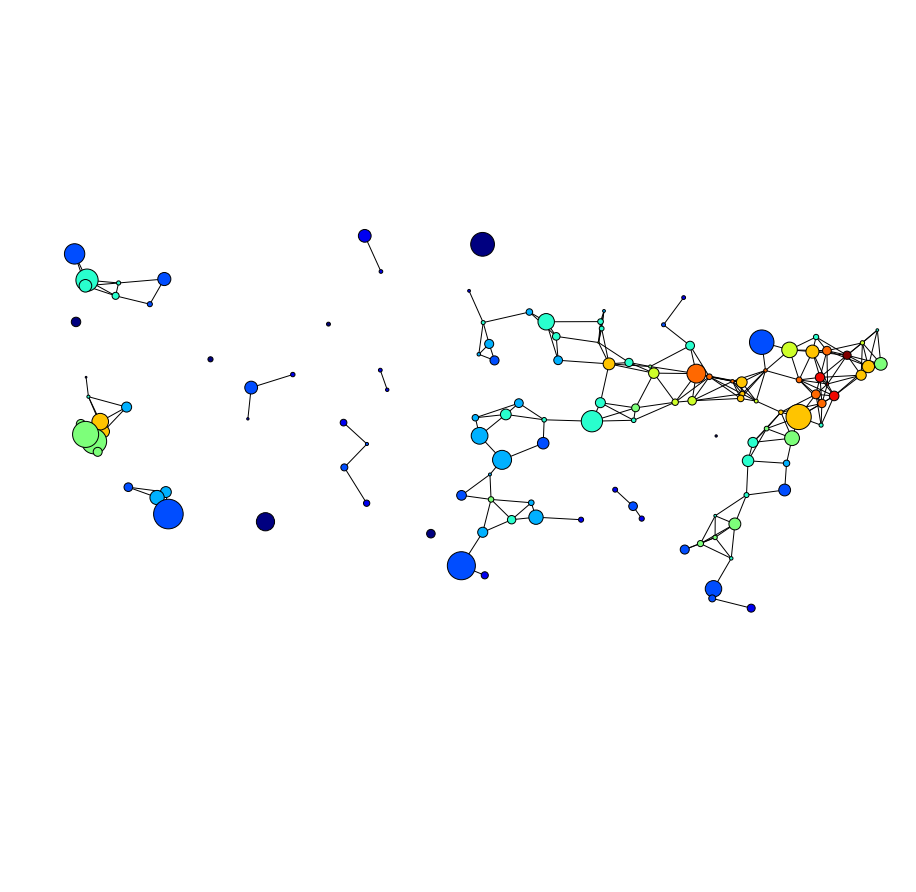

In [7]:
#!/usr/bin/env python
"""
An example using networkx.Graph().

miles_graph() returns an undirected graph over the 128 US cities from
the datafile miles_dat.txt. The cities each have location and population
data.  The edges are labeled with the distance betwen the two cities.

This example is described in Section 1.1 in Knuth's book [1,2].

References.
-----------

[1] Donald E. Knuth,
    "The Stanford GraphBase: A Platform for Combinatorial Computing",
    ACM Press, New York, 1993.
[2] http://www-cs-faculty.stanford.edu/~knuth/sgb.html


"""
__author__ = """Aric Hagberg (hagberg@lanl.gov)"""
#    Copyright (C) 2004-2006 by 
#    Aric Hagberg <hagberg@lanl.gov>
#    Dan Schult <dschult@colgate.edu>
#    Pieter Swart <swart@lanl.gov>
#    All rights reserved.
#    BSD license.

import networkx as nx


def miles_graph():
    """ Return the cites example graph in miles_dat.txt
        from the Stanford GraphBase.
    """
    # open file miles_dat.txt.gz (or miles_dat.txt)
    import gzip
    fh = gzip.open('data/knuth_miles.txt.gz','r')

    G=nx.Graph()
    G.position={}
    G.population={}

    cities=[]
    for line in fh.readlines():
        line = line.decode()
        if line.startswith("*"): # skip comments
            continue

        numfind=re.compile("^\d+") 

        if numfind.match(line): # this line is distances
            dist=line.split()
            for d in dist:
                G.add_edge(city,cities[i],weight=int(d))
                i=i+1
        else: # this line is a city, position, population
            i=1
            (city,coordpop)=line.split("[")
            cities.insert(0,city)
            (coord,pop)=coordpop.split("]")
            (y,x)=coord.split(",")
        
            G.add_node(city)
            # assign position - flip x axis for matplotlib, shift origin
            G.position[city]=(-int(x)+7500,int(y)-3000)
            G.population[city]=float(pop)/1000.0
    return G            

if __name__ == '__main__':
    import networkx as nx
    import re
    import sys

    G=miles_graph()

    print("Loaded miles_dat.txt containing 128 cities.")
    print("digraph has %d nodes with %d edges and a density of %d"\
          %(nx.number_of_nodes(G),nx.number_of_edges(G),nx.density(G)))


    # make new graph of cites, edge if less then 200 miles between them
    H=nx.Graph()
    for v in G:
        H.add_node(v)
    for (u,v,d) in G.edges(data=True):
        if d['weight'] < 200:
            H.add_edge(u,v)

    # draw with matplotlib/pylab            

    try:
        import matplotlib.pyplot as plt
        plt.figure(figsize=(12,12))
        # with nodes colored by degree sized by population
        node_color=[float(H.degree(v)) for v in H]
        nx.draw(H,G.position,
             node_size=[G.population[v] for v in H],
             node_color=node_color,
             with_labels=False)

        # scale the axes equally
        plt.xlim(-5000,500)
        plt.ylim(-2000,3500)

        plt.show()
    except:
        pass





#### Social media dataset graph

*This example is adapted from an [excellent blog post](https://blog.dominodatalab.com/social-network-analysis-with-networkx/) on exploratory data analysis with NetworkX. The iPython Notebook for this example is [here](https://app.dominodatalab.com/LeJit/FacebookNetwork/view/results/SocialNetwork.html). The dataset is an ego network (network with one central node) representing the Facebook friend networks of ten individuals. The vertices represent Facebook users and the edges linking two users represent Facebook friendship. This dataset has 4039 vertices (nodes) and 88234 edges (a relatively small network).*

In [9]:
G_fb = nx.read_edgelist("data/facebook_combined.txt", create_using = nx.Graph(), nodetype = int)


In [10]:
#Quick snapshot of the Network
print (nx.info(G_fb))

Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910


In [11]:
nx.density(G_fb)

0.010819963503439287

In [12]:
#Create network layout for visualizations
spring_pos = nx.spring_layout(G_fb)

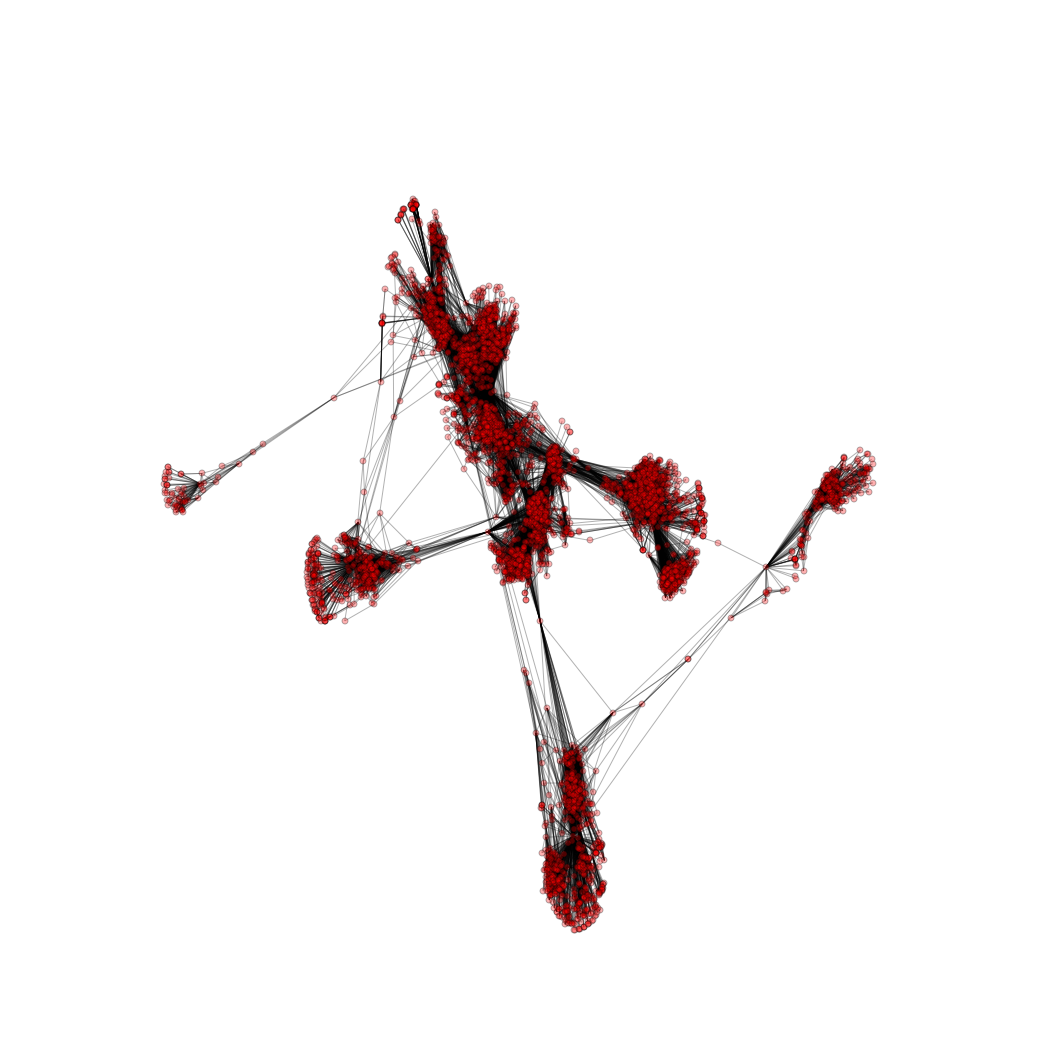

In [13]:
plt.figure(figsize=(18,18))
plt.axis("off")
nx.draw_networkx(G_fb, pos = spring_pos, with_labels = False, node_size = 35, alpha=0.3)

In [ ]:
#Create network layout for visualizations
#
# shell_pos = nx.shell_layout(G_fb, nlist=None, dim=2, scale=5)

In [ ]:
#plt.axis("off")
#nx.draw_networkx(G_fb, pos = shell_pos, with_labels = False, node_size = 5)

In [14]:
import community

In [15]:
parts = community.best_partition(G_fb)
values = [parts.get(node) for node in G_fb.nodes()]

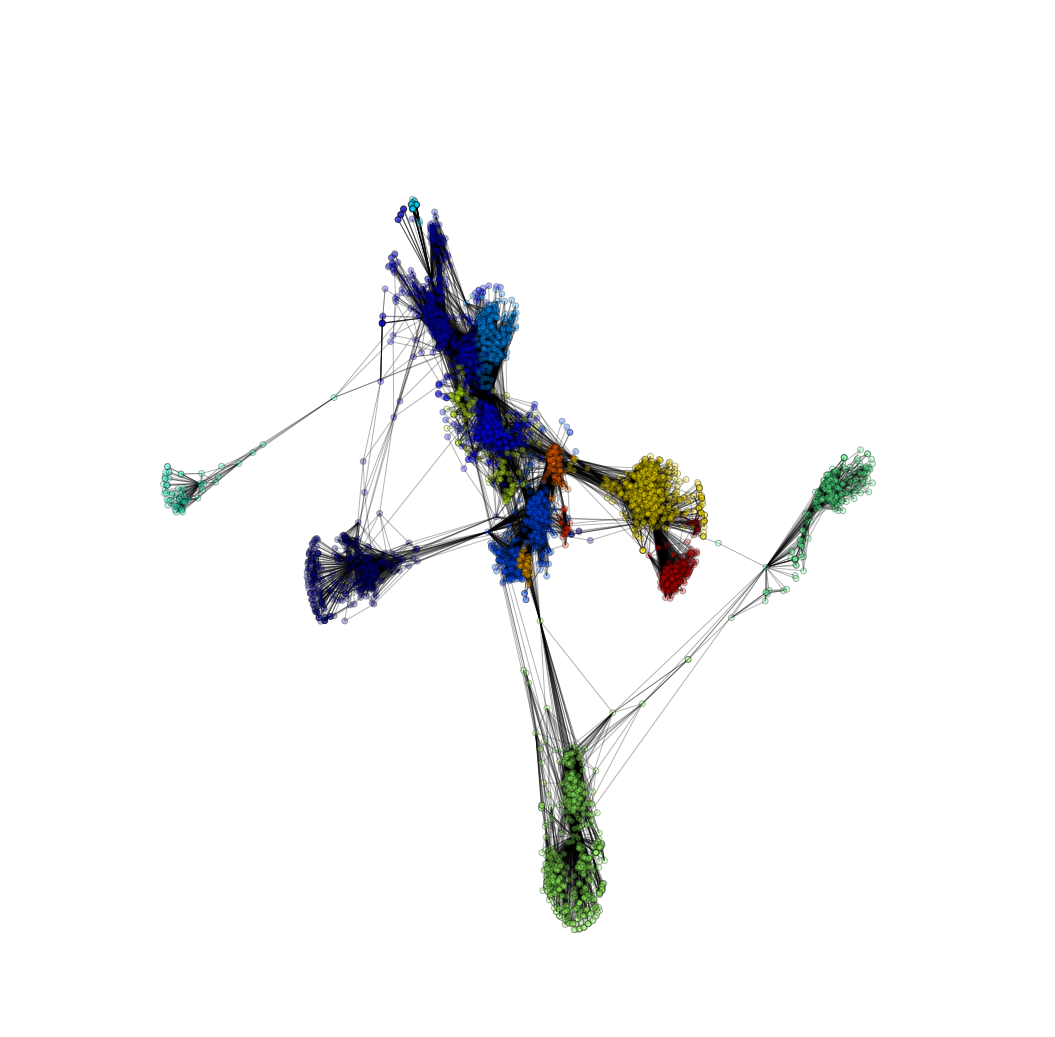

In [16]:
plt.figure(figsize=(18,18))
plt.axis("off")
nx.draw_networkx(G_fb, pos = spring_pos, cmap = plt.get_cmap("jet"), node_color = values, node_size = 35, with_labels = False, alpha=0.3)